In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = x_1 + e
    return y, x_1, x_2

In [3]:
# Setup test
def setup_test_params(y, x_1, x_2):
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    return ols, ridge, lasso 

In [4]:
# Scatterplots
def params_scatterplot(x):
    for model in list(setup_test_params(y, x_1, x_2)):
        plt.scatter(range(len(model.params)), model.params)
        plt.legend(['ols', 'ridge', 'lasso'])

In [5]:
# MSE
def setup_test_mse(y, x_1, x_2, k):
    y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
    lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
    ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
    return ols_mse, lasso_mse, ridge_mse

In [6]:
# Calculate MSEs
def mse(lst):
    df = pd.DataFrame(lst, columns=['ols_mse', 'lasso_mse', 'ridge_mse'])
    df['diff_ols_lasso'] = df['ols_mse'] - df['lasso_mse']
    df['diff_ols_ridge'] = df['ols_mse'] - df['ridge_mse']
    df['diff_lasso_ridge'] = df['ridge_mse'] - df['lasso_mse']
    lst_cols = ['diff_ols_lasso','diff_ols_ridge','diff_lasso_ridge']
    for i in lst_cols:
        sd = df[i].std()
        df[i] = -1*df[i]/sd * math.sqrt(1000)
    plt.hist(df['diff_ols_lasso'],label='diff_ols_lasso')
    plt.hist(df['diff_ols_ridge'],label='diff_ols_ridge')
    plt.hist(df['diff_lasso_ridge'],label='diff_lasso_ridge')
    plt.legend()
    plt.show()

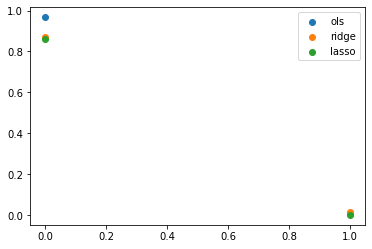

In [7]:
# num_cov = 1
k = 1
y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
x = setup_test_params(y, x_1, x_2)
params_scatterplot(x)

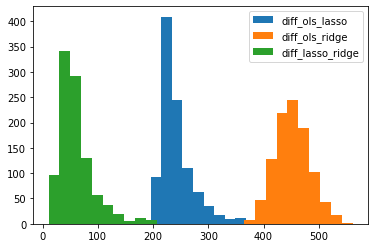

In [8]:
lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2, k)
    lst.append(results)
mse(lst)

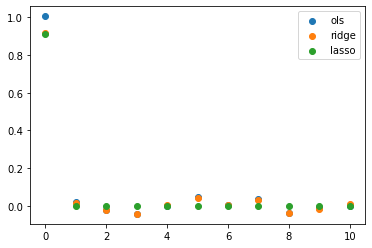

In [9]:
# num_cov = 10
k = 10
y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
x = setup_test_params(y, x_1, x_2)
params_scatterplot(x)

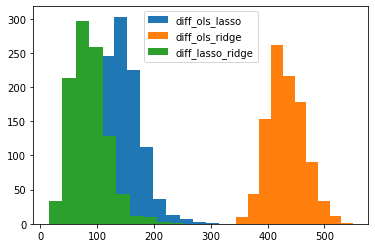

In [10]:
lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2, k)
    lst.append(results)
mse(lst)

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [11]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge
    
    
# MSE
def setup_test_mse(y, x_1, x_2, n, k, a, m, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
    X = np.column_stack((x_1, x_2))

    if model == 1:
        ols = sm.OLS(y, X).fit()
        ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
        return ols_mse
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
        return lasso_mse
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
        return ridge_mse
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
        return ols_mse, lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
        return ols_mse, ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
        return lasso_mse, ridge_mse

# Calculate MSEs
def mse(lst, n, i, model):
    if model == 1 or model == 2 or model == 3:
        lst_cols = ['mse_' + str(i)]
        df = pd.DataFrame(lst, columns=lst_cols)
        for j in lst_cols:
            sd = df[j].std()
            df[j] = -1*df[j]/sd * math.sqrt(n)
        print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
        return plt.hist(df['mse_'+str(i)], label='mse_'+str(i))
    else:
        lst_cols = ['1','2']
        df = pd.DataFrame(lst, columns=lst_cols)
        df['diff'] = df['1'] - df['2']
        lst_cols = ['diff']
        df = df.drop(columns=['1','2'])
        for j in lst_cols:
            sd = df[j].std()
            df[j] = -1*df[j]/sd * math.sqrt(n)
        print("Mean:", np.mean(df), "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df))
        return plt.hist(df['diff'],label='diff_'+str(i),alpha=0.5)

### Varying values

In [12]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        y, x_1, x_2 = gen_data(nobs=i, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(i):
            results = setup_test_mse(y, x_1, x_2, i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, i, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(y, x_1, x_2, n, k, j, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(y, x_1, x_2, n, i, j, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(y, x_1, x_2, n, k, j, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
            plt.legend()
            plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
            plt.legend(['model1','model2'])
            plt.show()

Vary Observations
Mean: -57.35213021478418 Median: -56.954788574343304 Mode: [[-81.01214697]] Variance: 99.00000000000001
Mean: -174.68201251079512 Median: -173.6726221356622 Mode: [[-233.74593921]] Variance: 249.0
Mean: -351.21244628454826 Median: -350.89276782379164 Mode: [[-445.67553346]] Variance: 498.99999999999994
Mean: -714.9830754356933 Median: -714.7957459017096 Mode: [[-818.42908269]] Variance: 998.9999999999997


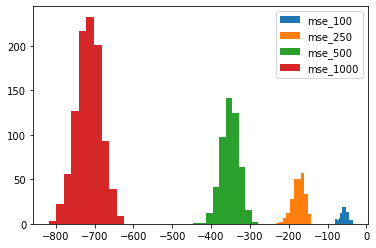

Vary Alpha Levels
Mean: -680.1641796372899 Median: -678.9749504669098 Mode: [[-791.89829125]] Variance: 999.0000000000001
Mean: -738.9768506572727 Median: -739.0602815168579 Mode: [[-841.09923523]] Variance: 998.9999999999998
Mean: -722.3110447746515 Median: -721.7087794326974 Mode: [[-824.36051528]] Variance: 998.9999999999995
Mean: -695.7933240152344 Median: -696.1582916486382 Mode: [[-802.64543873]] Variance: 999.0000000000016


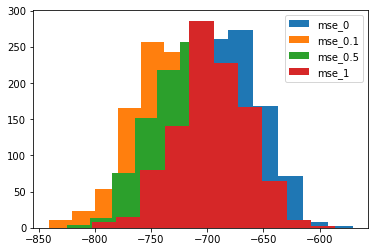

Vary Multiplicative Factors
Mean: -714.3357260954748 Median: -712.8889998083057 Mode: [[-815.79685631]] Variance: 999.0000000000014
Mean: -723.3933259328023 Median: -721.6833881653869 Mode: [[-840.3700234]] Variance: 999.0000000000001
Mean: -690.0893682716745 Median: -690.1088774179759 Mode: [[-817.55451728]] Variance: 998.9999999999982
Mean: -718.6631577041169 Median: -718.5372113488374 Mode: [[-828.9657427]] Variance: 998.9999999999999


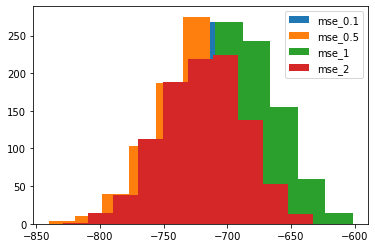

Vary X Variables
Mean: -732.8323267456241 Median: -732.6485250213045 Mode: [[-825.61831381]] Variance: 998.9999999999992
Mean: -686.9156564579597 Median: -686.5630302780526 Mode: [[-785.82544872]] Variance: 999.0000000000005
Mean: -677.1291732093869 Median: -675.773005758426 Mode: [[-786.78902077]] Variance: 998.9999999999993
Mean: -679.3637358088499 Median: -678.2593885464604 Mode: [[-799.55012268]] Variance: 999.0000000000015


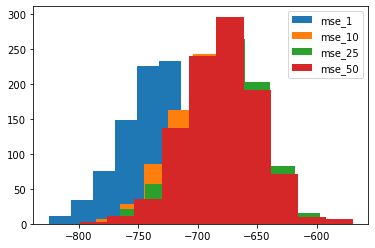

Plot Coefficients


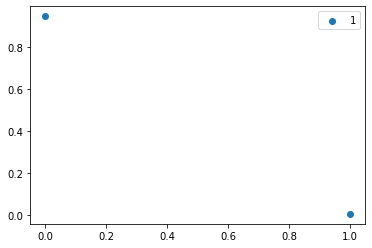

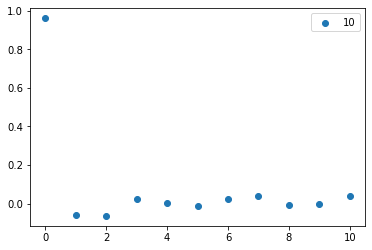

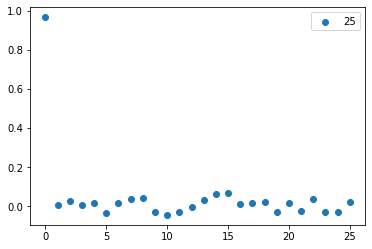

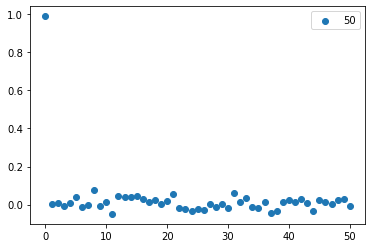

In [13]:
# Model = 1 is OLS
print('Vary Observations')
vary_obs(1)
print('Vary Alpha Levels')
vary_alpha(1)
print('Vary Multiplicative Factors')
vary_multiply(1)
print('Vary X Variables')
vary_xvars(1)
print('Plot Coefficients')
params_scatter(1)

Vary Observations
Mean: -66.6415432437972 Median: -65.58998376442523 Mode: [[-94.57695331]] Variance: 99.00000000000007
Mean: -183.86036762193123 Median: -184.06025005807732 Mode: [[-231.44218183]] Variance: 248.99999999999977
Mean: -380.8671337851782 Median: -381.20454063243517 Mode: [[-440.24137977]] Variance: 499.00000000000034
Mean: -726.1033844508717 Median: -725.4885899704362 Mode: [[-831.65196887]] Variance: 999.0000000000016


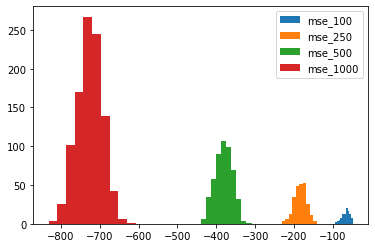

Vary Alpha Levels
Mean: -359.5317150724456 Median: -361.5622273170455 Mode: [[-408.06568596]] Variance: 998.9999999999973
Mean: -361.2727502860674 Median: -363.56091955776276 Mode: [[-416.9765636]] Variance: 999.0000000000006
Mean: -356.06266051675186 Median: -357.90083445072963 Mode: [[-418.37020422]] Variance: 998.9999999999997
Mean: -359.2180586036421 Median: -361.78228112859824 Mode: [[-413.14535294]] Variance: 998.9999999999968


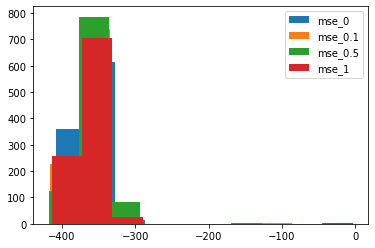

Vary Multiplicative Factors
Mean: -713.1887885620661 Median: -713.9277512269301 Mode: [[-817.8778863]] Variance: 998.999999999999
Mean: -681.2509844830914 Median: -680.4720625187737 Mode: [[-791.15488414]] Variance: 998.9999999999995
Mean: -655.2110762745845 Median: -655.5654239905599 Mode: [[-751.11172355]] Variance: 999.0000000000008
Mean: -571.9909429745587 Median: -571.6887963338897 Mode: [[-676.58471194]] Variance: 998.9999999999999


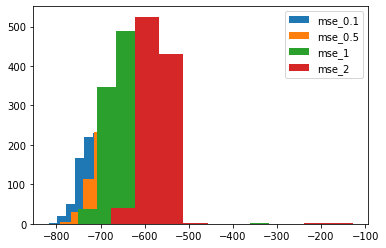

Vary X Variables
Mean: -694.4637593282472 Median: -694.5126956574925 Mode: [[-790.35862615]] Variance: 998.9999999999998
Mean: -668.4026800864744 Median: -668.381596696622 Mode: [[-768.49699883]] Variance: 998.9999999999984
Mean: -667.0049880394645 Median: -665.900814854069 Mode: [[-778.73606436]] Variance: 999.0000000000019
Mean: -659.5439518569764 Median: -659.9320055259349 Mode: [[-772.94789288]] Variance: 999.0000000000005


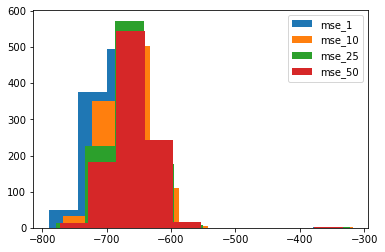

Plot Coefficients


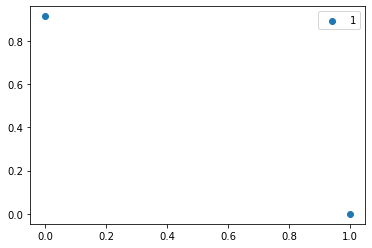

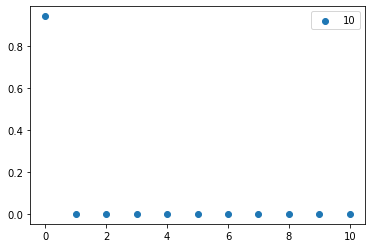

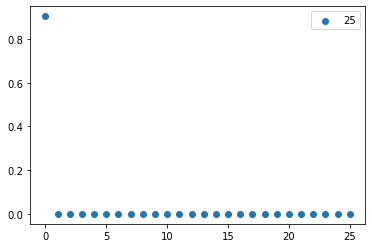

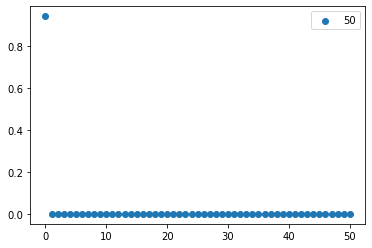

In [14]:
# Model = 2 is Lasso
print('Vary Observations')
vary_obs(2)
print('Vary Alpha Levels')
vary_alpha(2)
print('Vary Multiplicative Factors')
vary_multiply(2)
print('Vary X Variables')
vary_xvars(2)
print('Plot Coefficients')
params_scatter(2)

Vary Observations
Mean: -68.32254686045746 Median: -66.88689296223487 Mode: [[-95.40886661]] Variance: 99.0
Mean: -172.80801839885066 Median: -172.18929846445394 Mode: [[-221.2306725]] Variance: 249.00000000000006
Mean: -336.66002181300183 Median: -334.6977591848211 Mode: [[-398.37889007]] Variance: 498.9999999999999
Mean: -719.0825264190597 Median: -720.0393934907852 Mode: [[-820.13335617]] Variance: 999.0000000000013


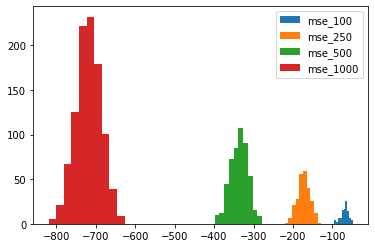

Vary Alpha Levels
Mean: -467.8654606540865 Median: -470.10169002701855 Mode: [[-529.72413759]] Variance: 999.0000000000018
Mean: -465.3977080939168 Median: -467.4337745998198 Mode: [[-540.04110446]] Variance: 998.9999999999969
Mean: -463.36495635476433 Median: -464.9098580814656 Mode: [[-526.77423728]] Variance: 999.0000000000007
Mean: -461.39868578824917 Median: -462.5537308484681 Mode: [[-538.67353521]] Variance: 998.9999999999992


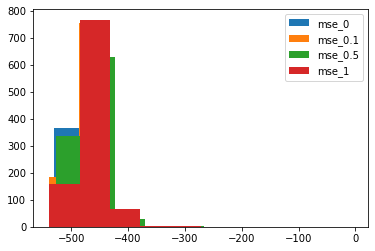

Vary Multiplicative Factors
Mean: -707.3365569967956 Median: -706.4406184849295 Mode: [[-807.33721744]] Variance: 998.9999999999994
Mean: -675.4911028403387 Median: -675.5022046490473 Mode: [[-774.10074396]] Variance: 998.9999999999985
Mean: -616.5590374955148 Median: -617.5598994627533 Mode: [[-720.31016334]] Variance: 999.0000000000013
Mean: -521.8048649469085 Median: -524.1176042488114 Mode: [[-610.31376619]] Variance: 999.0000000000011


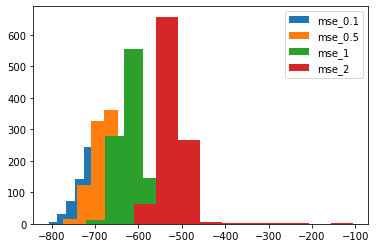

Vary X Variables
Mean: -624.8150388526432 Median: -625.5527950212581 Mode: [[-724.61639497]] Variance: 999.0000000000003
Mean: -613.190657461581 Median: -613.8174958082659 Mode: [[-722.8659933]] Variance: 998.9999999999994
Mean: -598.8742080312371 Median: -598.712056940527 Mode: [[-701.36649624]] Variance: 998.9999999999992
Mean: -587.9030716405157 Median: -589.625013442802 Mode: [[-683.8835532]] Variance: 999.0000000000001


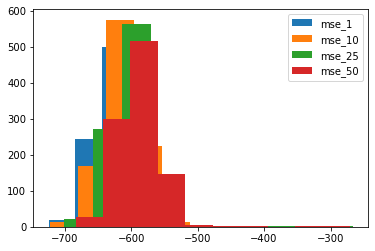

Plot Coefficients


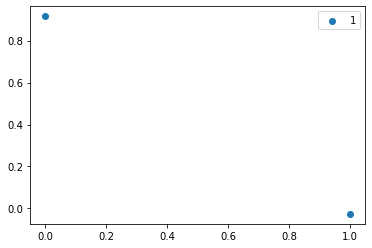

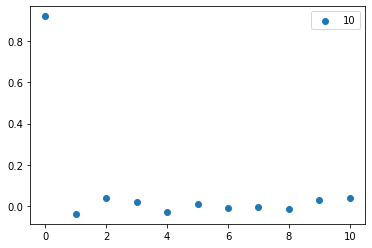

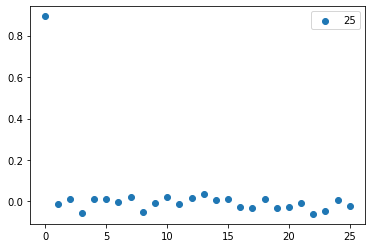

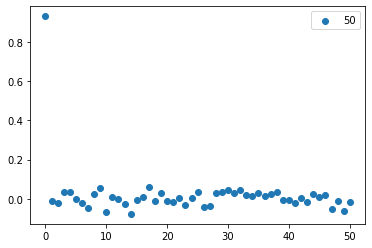

In [15]:
# Model = 3 is Ridge
print('Vary Observations')
vary_obs(3)
print('Vary Alpha Levels')
vary_alpha(3)
print('Vary Multiplicative Factors')
vary_multiply(3)
print('Vary X Variables')
vary_xvars(3)
print('Plot Coefficients')
params_scatter(3)

Vary Observations
Mean: diff    44.231997
dtype: float64 Median: 42.967127698483694 Mode: [[24.05776599]] Variance: diff    99.0
dtype: float64
Mean: diff    63.390581
dtype: float64 Median: 62.504820061200135 Mode: [[27.19466242]] Variance: diff    249.0
dtype: float64
Mean: diff    91.655644
dtype: float64 Median: 90.76408129041741 Mode: [[45.45789426]] Variance: diff    499.0
dtype: float64
Mean: diff    143.778903
dtype: float64 Median: 139.55185608335225 Mode: [[83.53957009]] Variance: diff    999.0
dtype: float64


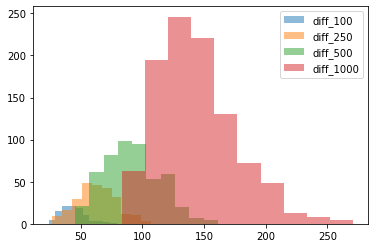

Vary Alpha Levels
Mean: diff    353.718872
dtype: float64 Median: 356.24933852836716 Mode: [[-7.90332608e-16]] Variance: diff    999.0
dtype: float64
Mean: diff    357.77714
dtype: float64 Median: 359.77772735993074 Mode: [[-4.00071426e-16]] Variance: diff    999.0
dtype: float64
Mean: diff    350.835062
dtype: float64 Median: 353.50429527680245 Mode: [[-3.92737306e-16]] Variance: diff    999.0
dtype: float64
Mean: diff    349.55729
dtype: float64 Median: 351.9242000888875 Mode: [[-1.56263404e-15]] Variance: diff    999.0
dtype: float64


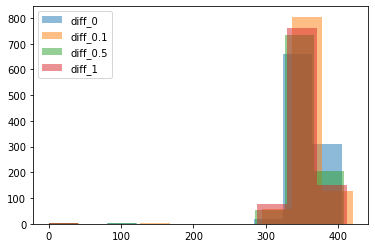

Vary Multiplicative Factors
Mean: diff    86.008886
dtype: float64 Median: 83.66095113804028 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    230.533076
dtype: float64 Median: 230.74645975655955 Mode: [[-1.96048161e-13]] Variance: diff    999.0
dtype: float64
Mean: diff    374.095085
dtype: float64 Median: 374.86001873557075 Mode: [[-8.21804301e-14]] Variance: diff    999.0
dtype: float64
Mean: diff    473.364725
dtype: float64 Median: 474.08463524954004 Mode: [[1.31459088e-14]] Variance: diff    999.0
dtype: float64


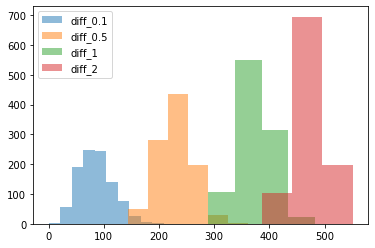

Vary X Variables
Mean: diff    379.584951
dtype: float64 Median: 379.7108597044354 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    384.706653
dtype: float64 Median: 384.12708667451636 Mode: [[4.21448805e-14]] Variance: diff    999.0
dtype: float64
Mean: diff    401.036471
dtype: float64 Median: 400.7136413805004 Mode: [[8.68668728e-14]] Variance: diff    999.0
dtype: float64
Mean: diff    388.265569
dtype: float64 Median: 388.0326500086198 Mode: [[4.11157791e-14]] Variance: diff    999.0
dtype: float64


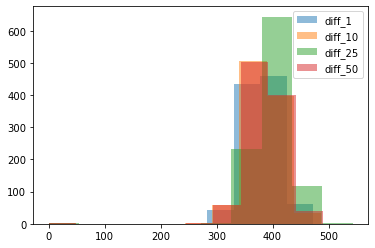

Plot Coefficients


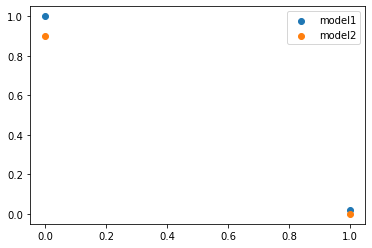

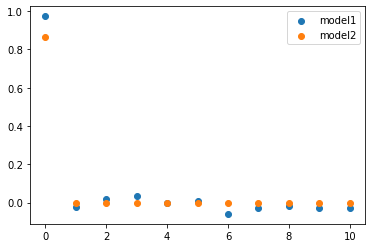

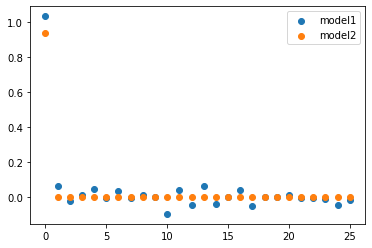

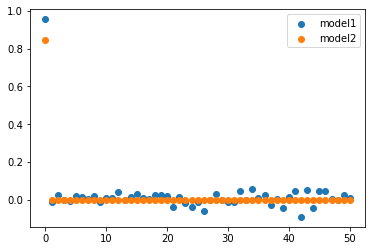

In [16]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)
print('Plot Coefficients')
params_scatter(4)

Vary Observations
Mean: diff    43.762882
dtype: float64 Median: 43.58682641613095 Mode: [[19.22103754]] Variance: diff    99.0
dtype: float64
Mean: diff    103.631027
dtype: float64 Median: 102.76975643456147 Mode: [[64.28152212]] Variance: diff    249.0
dtype: float64
Mean: diff    213.650543
dtype: float64 Median: 213.6621910504066 Mode: [[153.53147372]] Variance: diff    499.0
dtype: float64
Mean: diff    425.418166
dtype: float64 Median: 424.1871737844948 Mode: [[342.90012211]] Variance: diff    999.0
dtype: float64


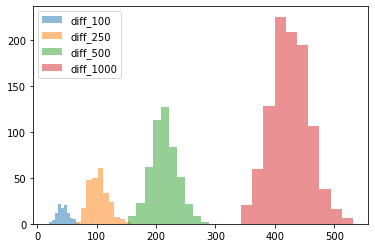

Vary Alpha Levels
Mean: diff    454.334031
dtype: float64 Median: 455.5737047125164 Mode: [[-5.11624408e-16]] Variance: diff    999.0
dtype: float64
Mean: diff    466.386778
dtype: float64 Median: 467.38922452583506 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    458.397103
dtype: float64 Median: 460.96506691529567 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    457.348442
dtype: float64 Median: 458.7643227399125 Mode: [[-0.]] Variance: diff    999.0
dtype: float64


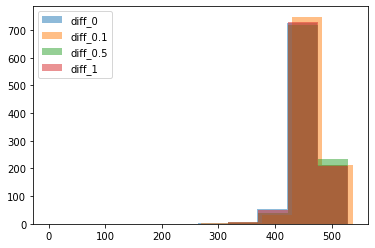

Vary Multiplicative Factors
Mean: diff    80.51865
dtype: float64 Median: 76.68572848223992 Mode: [[4.40235671e-13]] Variance: diff    999.0
dtype: float64
Mean: diff    231.018931
dtype: float64 Median: 230.99011279442675 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    342.125531
dtype: float64 Median: 341.7992772114968 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    419.788053
dtype: float64 Median: 421.5020387285614 Mode: [[-0.]] Variance: diff    999.0
dtype: float64


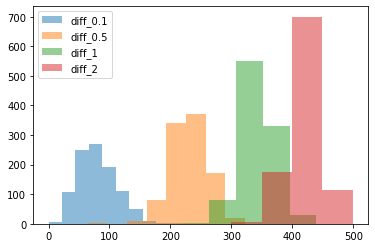

Vary X Variables
Mean: diff    332.028082
dtype: float64 Median: 332.08935618698877 Mode: [[-3.73314128e-14]] Variance: diff    999.0
dtype: float64
Mean: diff    345.929453
dtype: float64 Median: 346.34349382092597 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    351.428026
dtype: float64 Median: 351.6595054711926 Mode: [[-0.]] Variance: diff    999.0
dtype: float64
Mean: diff    349.831639
dtype: float64 Median: 351.2495668107309 Mode: [[-3.75449961e-14]] Variance: diff    999.0
dtype: float64


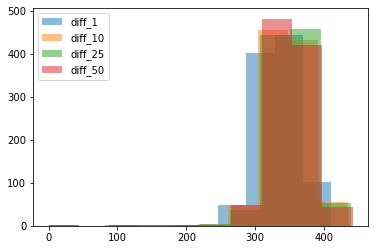

Plot Coefficients


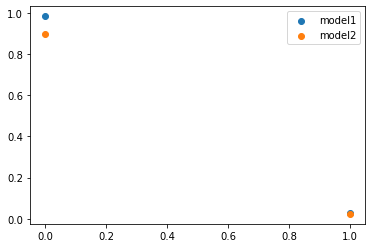

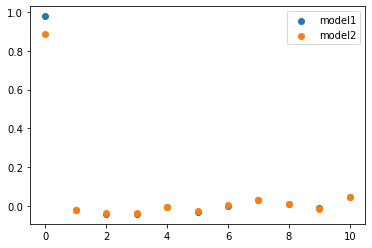

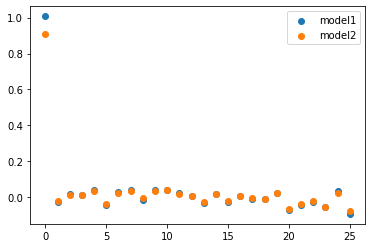

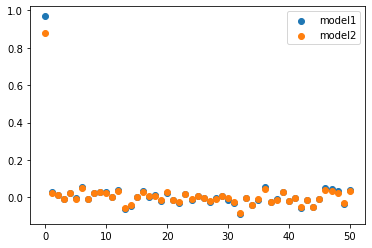

In [17]:
# Model = 5 is OlS - Lasso
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)
print('Plot Coefficients')
params_scatter(5)

Vary Observations
Mean: diff   -35.6964
dtype: float64 Median: -34.79732490653997 Mode: [[-66.97049245]] Variance: diff    99.0
dtype: float64
Mean: diff   -45.292066
dtype: float64 Median: -44.19213539719331 Mode: [[-91.65325853]] Variance: diff    249.0
dtype: float64
Mean: diff   -58.185584
dtype: float64 Median: -55.41388262564328 Mode: [[-134.85727733]] Variance: diff    499.0
dtype: float64
Mean: diff   -80.139298
dtype: float64 Median: -75.71692489406385 Mode: [[-207.50565779]] Variance: diff    999.0
dtype: float64


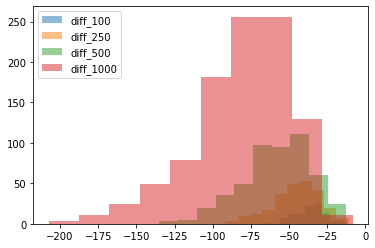

Vary Alpha Levels
Mean: diff   -5.214879
dtype: float64 Median: -3.349125455635688 Mode: [[-136.06145502]] Variance: diff    999.0
dtype: float64
Mean: diff   -5.366655
dtype: float64 Median: -3.4053036570337096 Mode: [[-130.42358867]] Variance: diff    999.0
dtype: float64
Mean: diff   -5.044608
dtype: float64 Median: -3.225458557049005 Mode: [[-130.92096349]] Variance: diff    999.0
dtype: float64
Mean: diff   -5.113392
dtype: float64 Median: -3.311284429441166 Mode: [[-139.41772141]] Variance: diff    999.0
dtype: float64


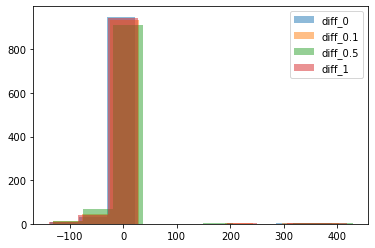

Vary Multiplicative Factors
Mean: diff   -8.183308
dtype: float64 Median: -2.586459009412807 Mode: [[-691.79370331]] Variance: diff    999.0
dtype: float64
Mean: diff   -9.324867
dtype: float64 Median: -2.9926387110069452 Mode: [[-601.68060371]] Variance: diff    999.0
dtype: float64
Mean: diff   -9.267768
dtype: float64 Median: -2.997919333362737 Mode: [[-536.46327752]] Variance: diff    999.0
dtype: float64
Mean: diff   -10.669441
dtype: float64 Median: -3.696595027586037 Mode: [[-504.18130728]] Variance: diff    999.0
dtype: float64


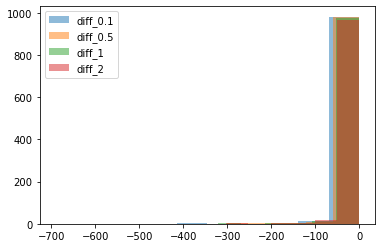

Vary X Variables
Mean: diff   -9.475656
dtype: float64 Median: -3.090387160567108 Mode: [[-545.32197382]] Variance: diff    999.0
dtype: float64
Mean: diff   -9.354451
dtype: float64 Median: -2.980347083427134 Mode: [[-547.40289988]] Variance: diff    999.0
dtype: float64
Mean: diff   -9.803287
dtype: float64 Median: -3.1520893434885346 Mode: [[-558.59449714]] Variance: diff    999.0
dtype: float64
Mean: diff   -9.712998
dtype: float64 Median: -3.1194782379111663 Mode: [[-523.19161951]] Variance: diff    999.0
dtype: float64


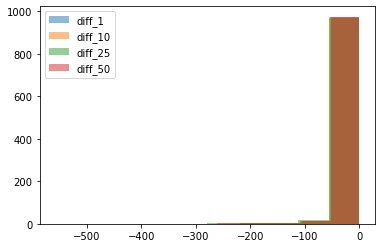

Plot Coefficients


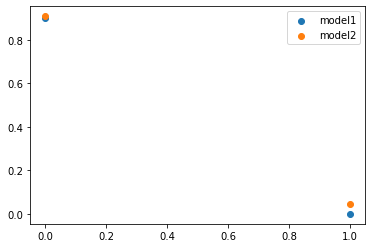

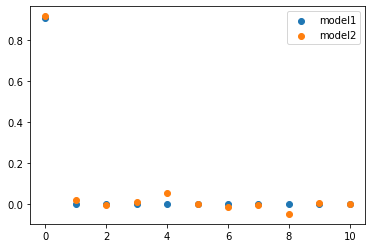

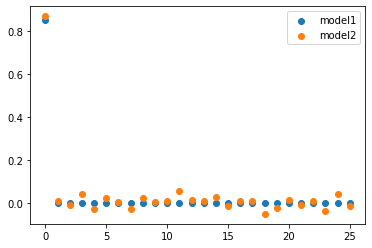

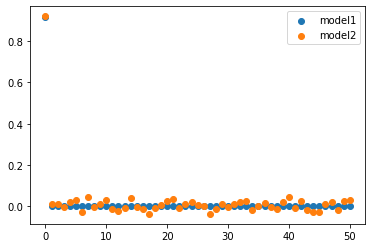

In [18]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6)
print('Plot Coefficients')
params_scatter(6)